<a href="https://colab.research.google.com/github/maikelele/traffic-sign-recognition/blob/label-studio/interface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import cv2
import ipywidgets as widgets
from IPython.display import display, Image
from google.colab import files
import numpy as np
!pip install ultralytics==8.0.196
import ultralytics

FileUpload(value={}, accept='.jpg, .jpeg, .png', description='Upload')

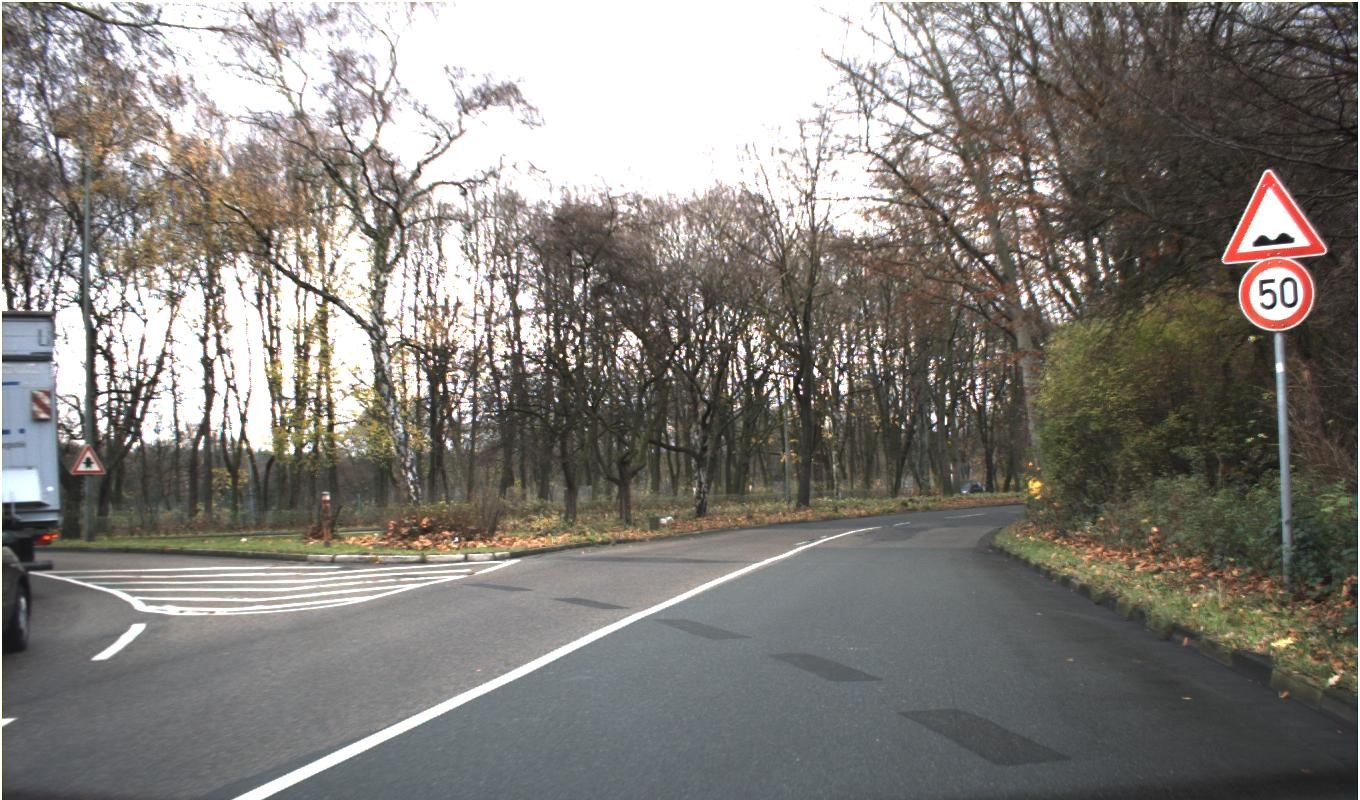

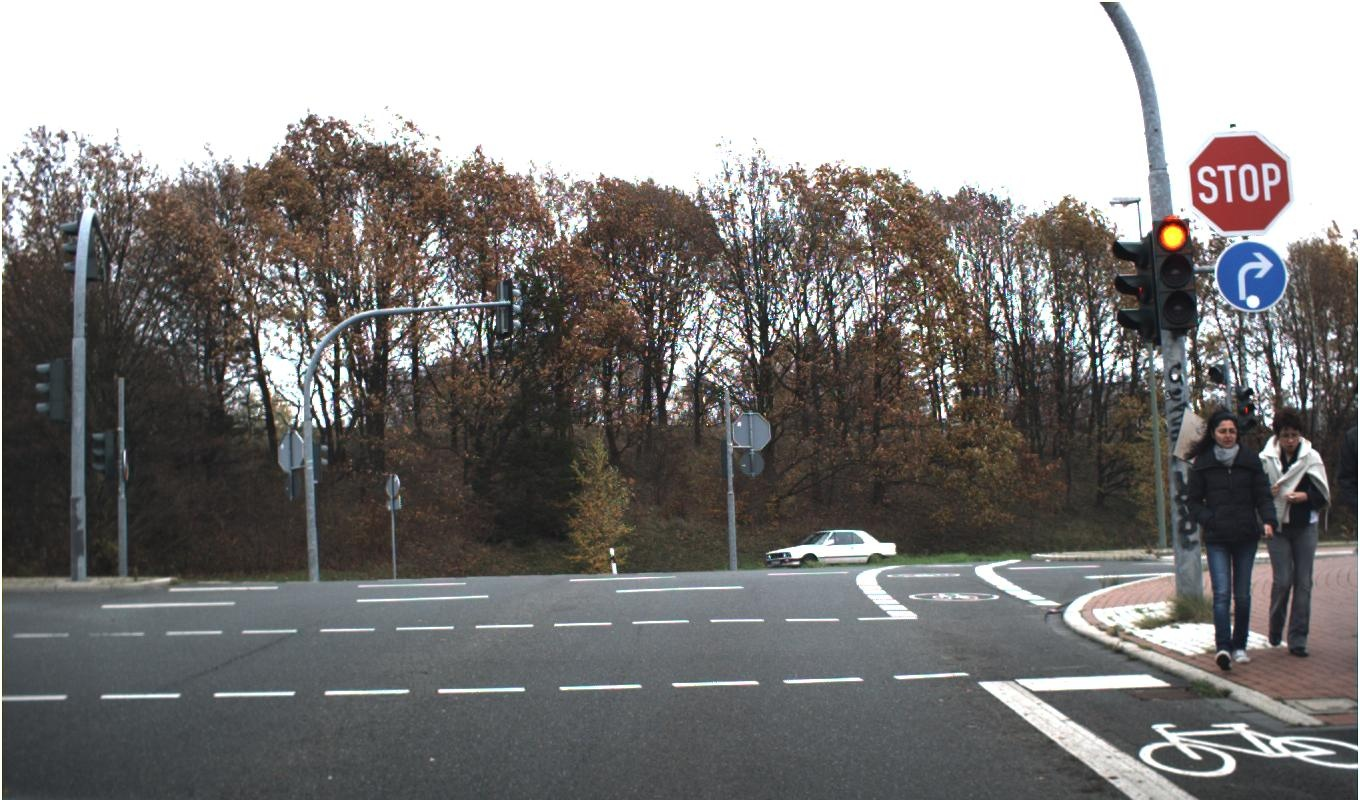

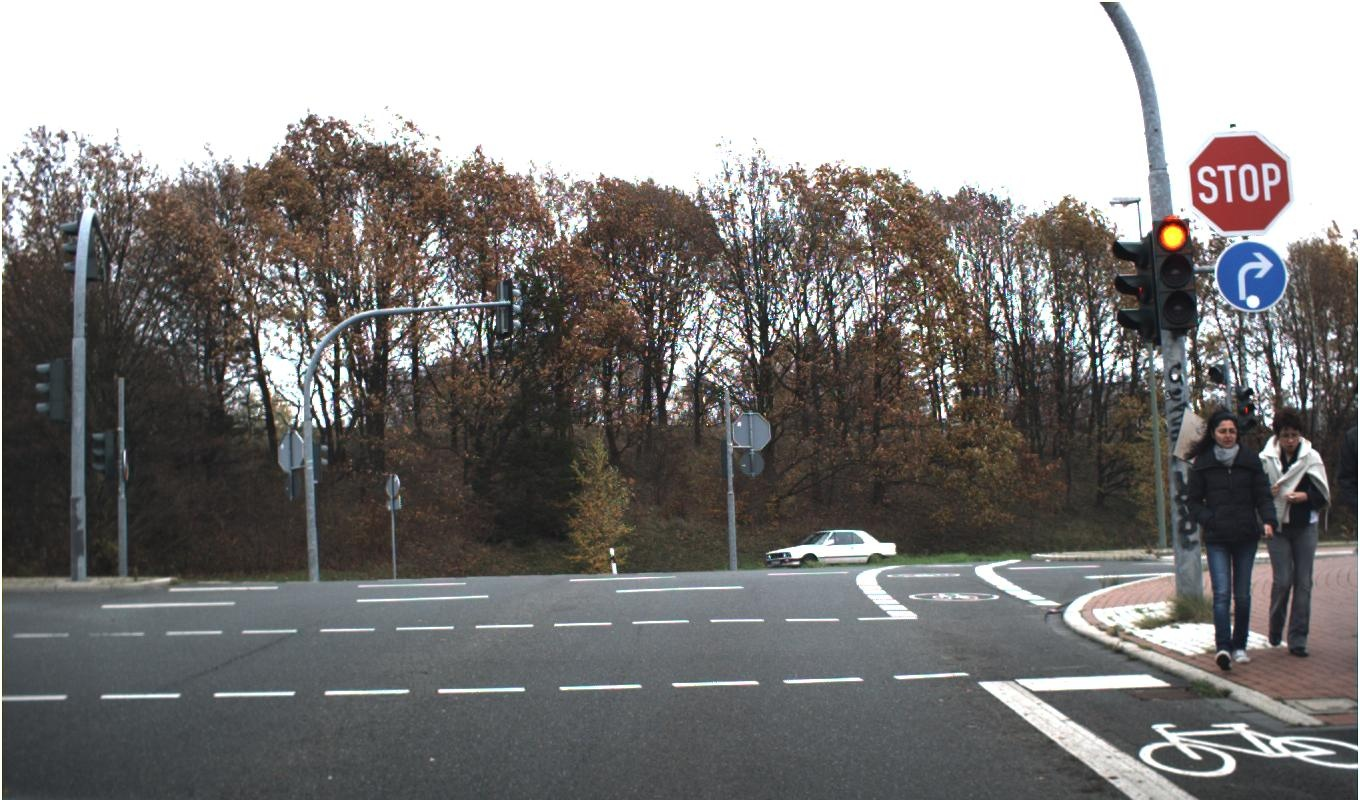

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 420, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 97, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 997, in load
    with _open_file_like(f, 'rb') as opened

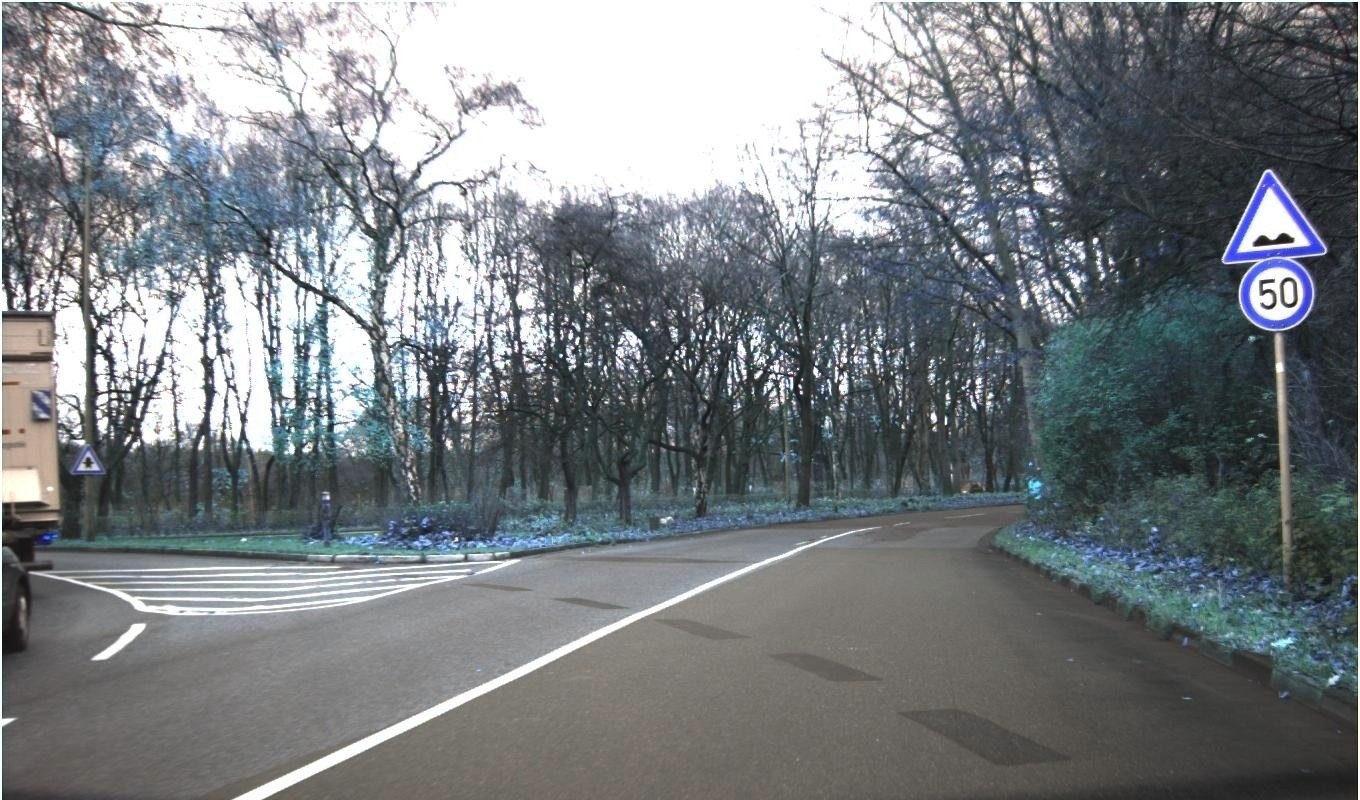

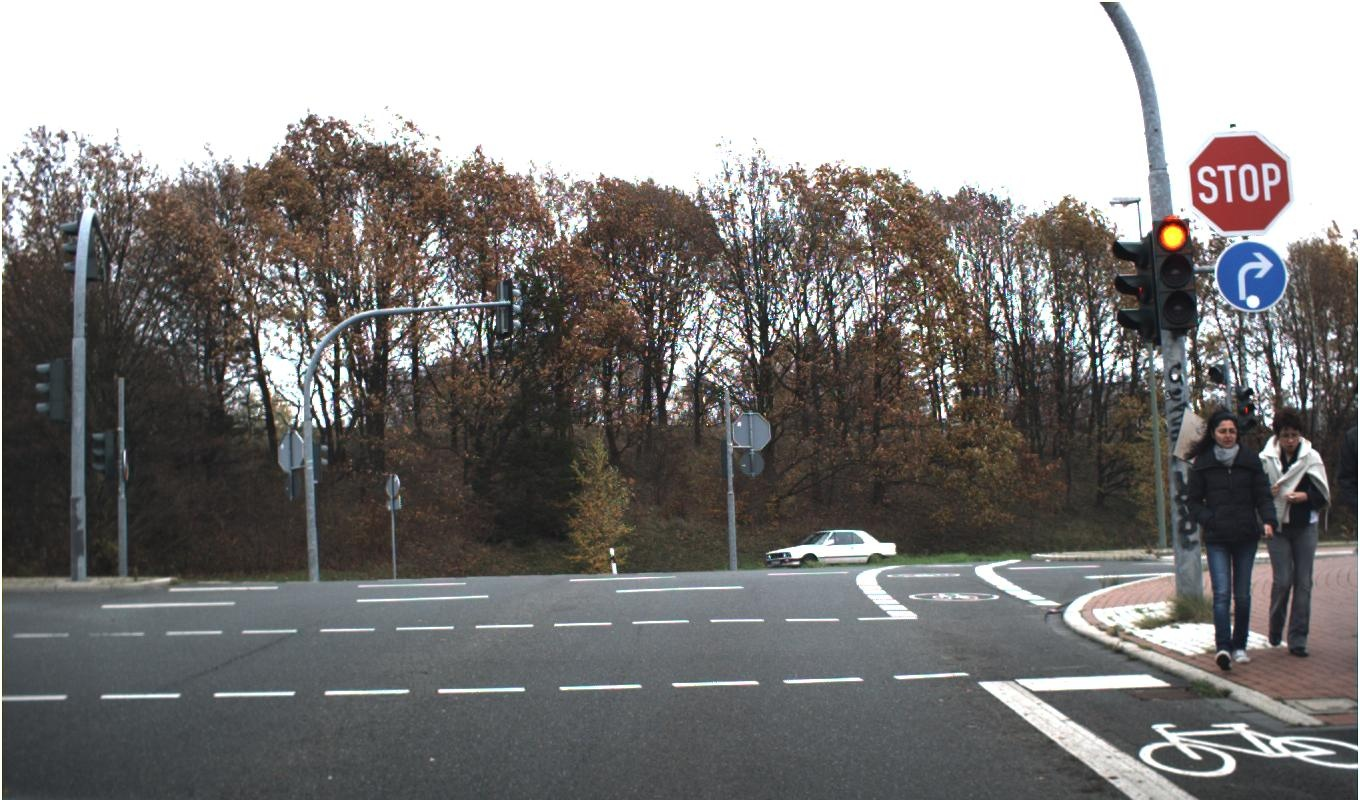

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/00214.jpg: 384x640 1 red_light, 476.4ms
Speed: 7.6ms preprocess, 476.4ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


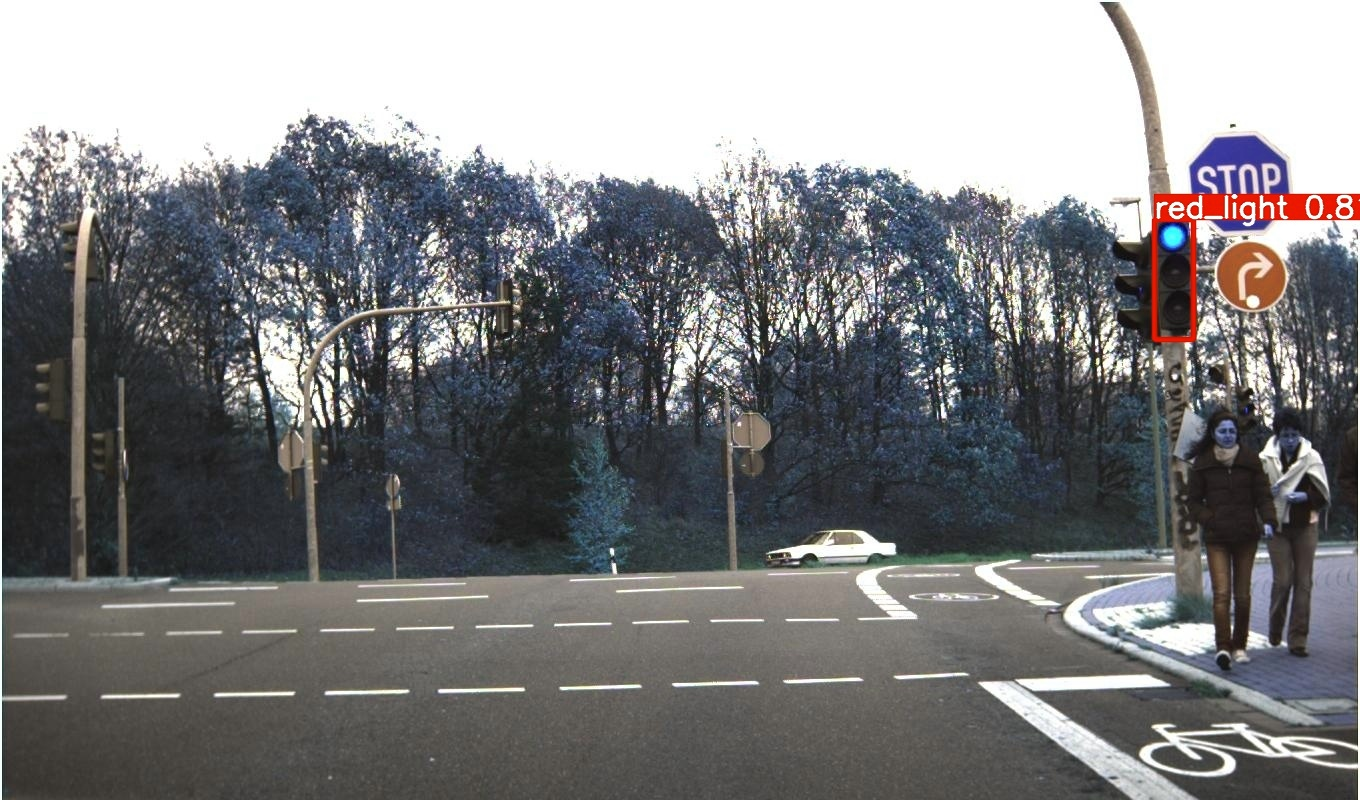

In [42]:
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Image
import os

# Create a file upload widget
file_upload = widgets.FileUpload(
    accept='.jpg, .jpeg, .png',  # Accepted file types
    multiple=False  # Single file upload
)

# Display the widget
display(file_upload)

def handle_file_upload(change):
    # Get the uploaded file
    uploaded_file = list(file_upload.value.values())[0]
    content = uploaded_file['content']
    metadata = uploaded_file['metadata']
    filename = metadata.get('name', 'uploaded_image.jpg')
    # Convert the uploaded file content to a numpy array
    np_arr = np.frombuffer(content, np.uint8)

    # Decode the numpy array to an image
    image = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)

    # Convert the image from BGR to RGB
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Encode the image to JPEG format
    _, buffer = cv2.imencode('.jpg', image)

    # Display the image
    display(Image(data=buffer.tobytes()))

    output_path = os.path.join('/content', filename)
    cv2.imwrite(output_path, image)

    return output_path

# Attach the function to the file upload widget
file_upload.observe(handle_file_upload, names='value')



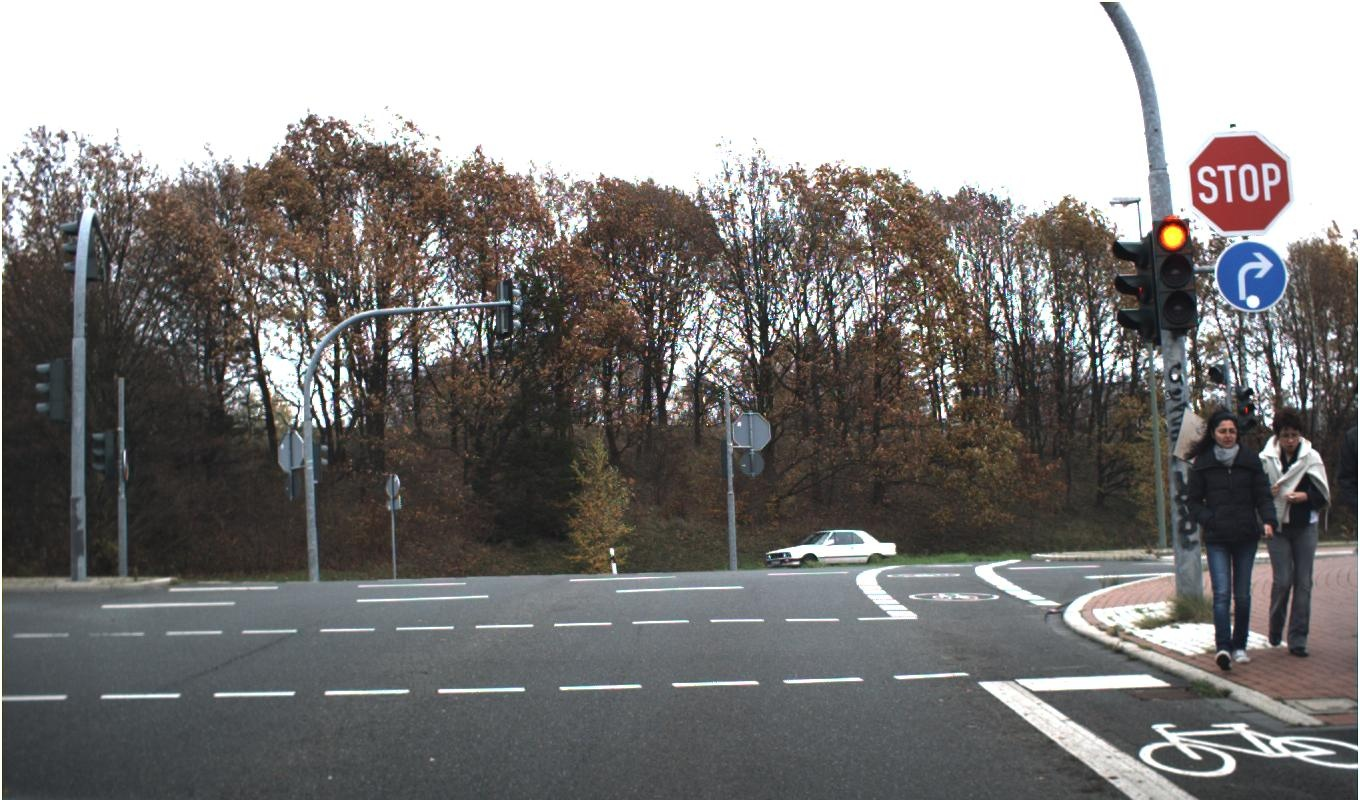

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11133711 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/00214.jpg: 384x640 1 red_light, 495.7ms
Speed: 7.6ms preprocess, 495.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


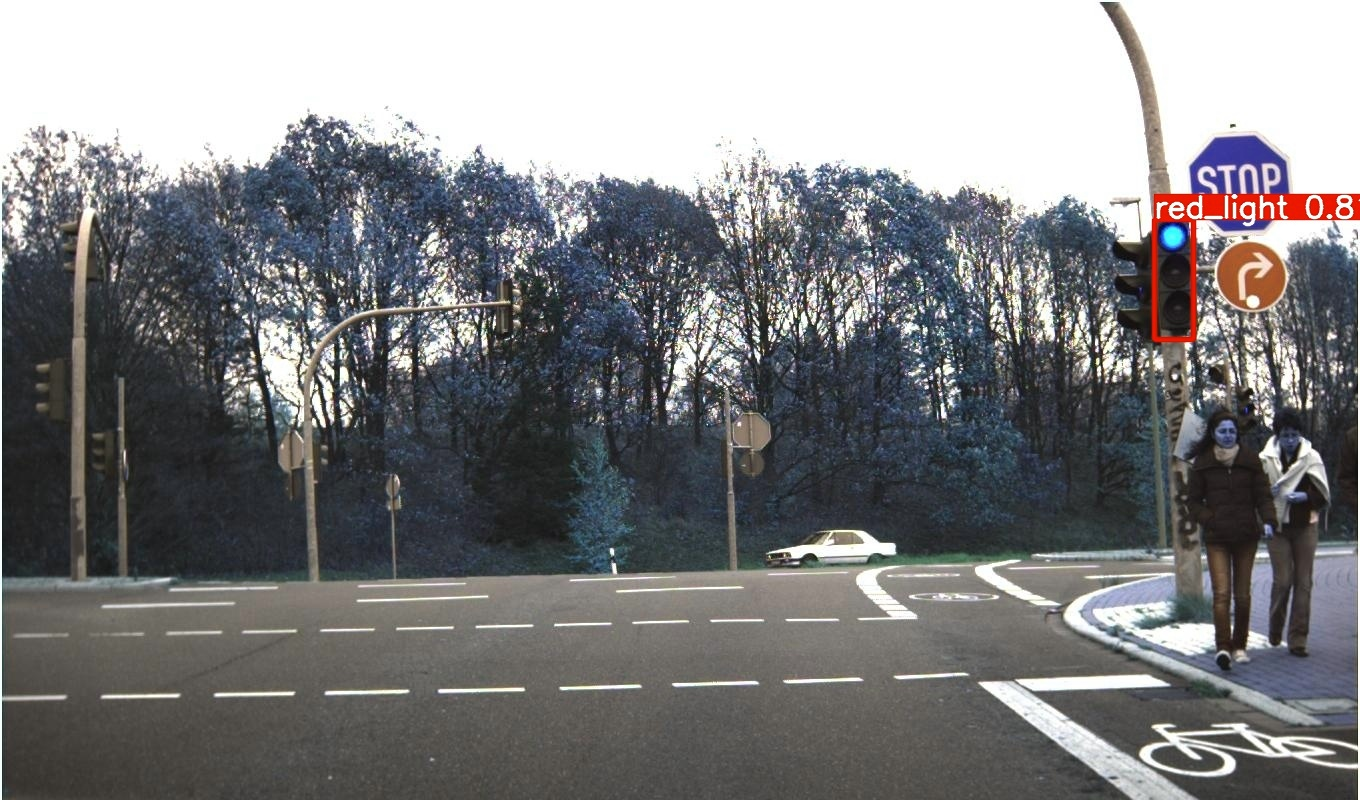

In [46]:
def get_latest_exp_dir(base_dir='/content/runs/detect'):
    exp_dirs = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    exp_dirs.sort(key=lambda x: os.path.getmtime(os.path.join(base_dir, x)), reverse=True)
    latest_exp_dir = exp_dirs[0] if exp_dirs else None
    return os.path.join(base_dir, latest_exp_dir) if latest_exp_dir else None

# Run YOLO prediction after the file is uploaded
def run_yolo_prediction(change):
    uploaded_file_path = handle_file_upload(None)  # Trigger file upload handling
    !yolo task=detect mode=predict model=/content/drive/MyDrive/YOLO_Training/best_yolov8.pt conf=0.15 source={uploaded_file_path}

    # Find the latest YOLO output directory
    latest_exp_dir = get_latest_exp_dir()

    if latest_exp_dir:
        # Find the predicted image (assuming there's only one image in the output directory)
        predicted_image_path = None
        for file_name in os.listdir(latest_exp_dir):
            if file_name.endswith(('.jpg', '.jpeg', '.png')):
                predicted_image_path = os.path.join(latest_exp_dir, file_name)
                break

        if predicted_image_path:
            # Load the predicted image
            predicted_image = cv2.imread(predicted_image_path)

            # Convert the image from BGR to RGB (for display purposes)
            predicted_image_rgb = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)

            # Encode the image to JPEG format
            _, buffer = cv2.imencode('.jpg', predicted_image_rgb)

            # Display the image
            display(Image(data=buffer.tobytes()))
        else:
            print("Predicted image not found.")
    else:
        print("YOLO output directory not found.")

# Attach the function to the file upload widget to run YOLO prediction
file_upload.observe(run_yolo_prediction, names='value')
run_yolo_prediction(file_upload)